In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
med=pd.read_csv('insurance.csv')
med.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
import pandas as pd
import plotly.express as px

# Sample dataframe
# Assuming you've already loaded your dataframe and it's named "med"

# Compute frequency distribution
freq_dist = med.groupby(['children', 'smoker']).size().reset_index(name='count')

# Generate bar plot
fig = px.bar(freq_dist, x='children', y='count', color='smoker', title='Number of Children vs Smoking Habits', labels={'children': 'Number of Children', 'count': 'Number of People'})

fig.show()

In [5]:
med.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#There is a duplicate row, considering the size of the data set and number of variables it is probably an error. So , let's drop it.
count = 0 
for i in med.duplicated():
    if i ==True:
        count += 1
print(count)

#Duplicate row
duplicate_rows = med[med.duplicated()]
print(duplicate_rows)

med = med.drop_duplicates()


1
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [8]:
#Some columns are as objects, so let's change them into categorical variables: Sex, smoker, region

med['sex'] = med['sex'].astype('category')
med['smoker'] = med['smoker'].astype('category')
med['region'] = med['region'].astype('category')

In [9]:
#Started with 1338, now 1337
med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int64   
 1   sex       1337 non-null   category
 2   bmi       1337 non-null   float64 
 3   children  1337 non-null   int64   
 4   smoker    1337 non-null   category
 5   region    1337 non-null   category
 6   charges   1337 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 56.6 KB


               age       bmi  children   charges
age       1.000000  0.109344  0.041536  0.298308
bmi       0.109344  1.000000  0.012755  0.198401
children  0.041536  0.012755  1.000000  0.067389
charges   0.298308  0.198401  0.067389  1.000000


/var/folders/g8/btdyhprd6l7_z7kmyr6qhzp80000gn/T/ipykernel_96629/2413140213.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



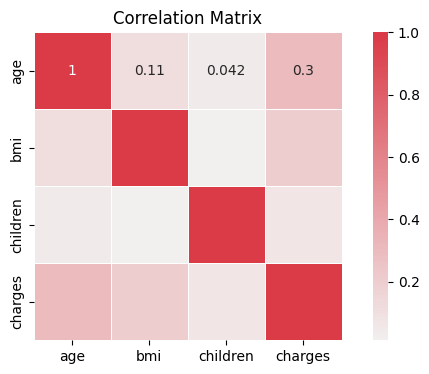

In [10]:
#Correlation matrix for numerical values
#There is no highly correlated relation between any two numerical values. 
import seaborn as sns
corr = med.corr()
print(corr)

# Create a diverging color palette centered on the Plotly blue
plotly_blue = "#1F77B4"
cmap = sns.diverging_palette(220, 10, center="light", as_cmap=True)

# Generate the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, cmap=cmap, linewidths=0.5, linecolor='white', vmax=1.0, center=0, square=True)
plt.title("Correlation Matrix")
plt.show()

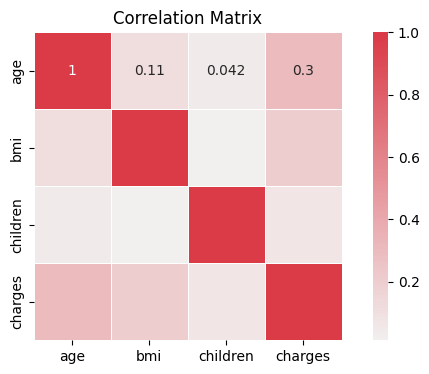

In [11]:
plotly_blue = "#1F77B4"
cmap = sns.diverging_palette(220, 10, center="light", as_cmap=True)

# Generate the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, cmap=cmap, linewidths=0.5, linecolor='white', vmax=1.0, center=0, square=True)
plt.title("Correlation Matrix")
plt.show()

In [12]:
#Let's investigate the demographocs:

# For age: min 22, max 69, mean 39. According to the histogram graph it seems like it is distributed similar to uniform distribution, except for ages close to the 20.

# Bmi seems to have a distribution close the normal distribution. It has a similar shape to symetrical bell shaped curve. Mean for bmi is 30.66. Max and min are 15.96 and 53.13

# For children column, we have max 5 and min 0. The percentage of people with 0 children in the data set is approximately 43 percent, followed by people having 1 children with  24.23% .

# For charges while the mean is 13270, max and min are 63770 and 1122 respectively. 50 percentile limit is 9382 and 75 percentile is 16640. After 30k only make up the 12.12 %.


import pandas as pd
import plotly.express as px

numerical_cols = med.select_dtypes(include=['float64', 'int64']).columns


for col in numerical_cols:
    fig = px.histogram(med, x=col, title=f'Histogram of {col}', opacity = 0.7)
    fig.show()

In [13]:
number_above_30000 = med[med['charges'] > 30000].shape[0]

percentage = (number_above_30000 / med.shape[0]) * 100

print(f"The percentage of people who have charges more than 30,000 is: {percentage:.2f}%")

The percentage of people who have charges more than 30,000 is: 12.12%


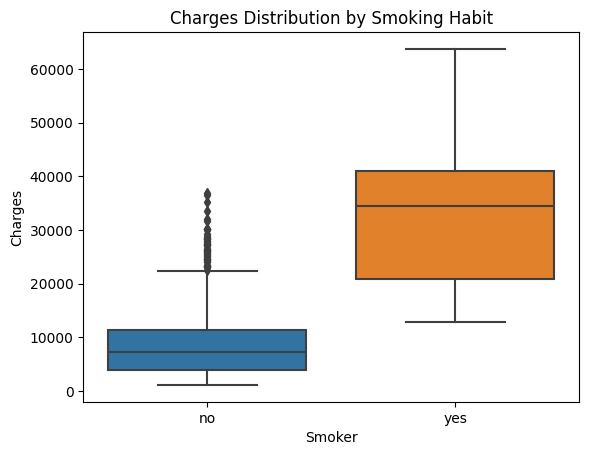

In [14]:
import seaborn as sns

# This graph clearly shows that people who smoke pay more in general.

sns.boxplot(x=med['smoker'], y=med['charges'])
plt.title('Charges Distribution by Smoking Habit')
plt.ylabel('Charges')
plt.xlabel('Smoker')
plt.show()


In [15]:
from scipy.stats import ttest_ind

smokers = med[med['smoker'] == 'yes']['charges']
non_smokers = med[med['smoker'] == 'no']['charges']

t_stat, p_value = ttest_ind(smokers, non_smokers)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

T-statistic: 46.64, P-value: 0.0000


In [16]:
import plotly.express as px

# No matter the bmi, the people who smoke pay more in general. The red dots representing the people who don't smoke are mostly below across all levels of bmi.

fig = px.scatter(med, x='bmi', y='charges', color='smoker',
                 title='Relationship between BMI and Charges color-coded by Smoking Habit')
fig.show()

In [17]:
import plotly.express as px

# No matter the bmi, the people who smoke pay more in general. The red dots representing the people who don't smoke are mostly below across all levels of bmi.

fig = px.scatter(med, x='age', y='charges', color='smoker',
                 title='Relationship between Age and Charges color-coded by Smoking Habit')
fig.show()

In [18]:
import plotly.express as px

# No matter the bmi, the people who smoke pay more in general. The red dots representing the people who don't smoke are mostly below across all levels of bmi.

fig = px.scatter(med, x='children', y='charges', color='smoker',
                 title='Relationship between Children and Charges color-coded by Smoking Habit')
fig.show()

In [19]:
# It seems like there is no unbalance for the region and gender columns, however people who don't smoke make up approximately 80 percent of the data ~ 0.7950635751682872. Since we have asmple size bigger than 1000, it is not going to be a problem unless we have extreme unbalances. Let's investigate other cross tables.

print(pd.crosstab(med['sex'], med['smoker'], margins=True, margins_name="Total"))

smoker    no  yes  Total
sex                     
female   547  115    662
male     516  159    675
Total   1063  274   1337


In [21]:
print(pd.crosstab(med['region'], med['smoker'], margins=True, margins_name="Total"))

smoker       no  yes  Total
region                     
northeast   257   67    324
northwest   266   58    324
southeast   273   91    364
southwest   267   58    325
Total      1063  274   1337


In [23]:
# Triple cross tab
from tabulate import tabulate

triple_ct = pd.crosstab([med['sex'], med['smoker']], med['region'])

print(tabulate(triple_ct, headers='keys', tablefmt='grid'))

+-------------------+-------------+-------------+-------------+-------------+
|                   |   northeast |   northwest |   southeast |   southwest |
+===================+=============+=============+=============+=============+
| ('female', 'no')  |         132 |         135 |         139 |         141 |
+-------------------+-------------+-------------+-------------+-------------+
| ('female', 'yes') |          29 |          29 |          36 |          21 |
+-------------------+-------------+-------------+-------------+-------------+
| ('male', 'no')    |         125 |         131 |         134 |         126 |
+-------------------+-------------+-------------+-------------+-------------+
| ('male', 'yes')   |          38 |          29 |          55 |          37 |
+-------------------+-------------+-------------+-------------+-------------+


In [24]:
spear_blue = '#005F73'

In [25]:
fig2 = px.violin(med, x='sex', y='bmi', title='BMI Distribution by Gender', color='sex',
                 color_discrete_map={'male': spear_blue, 'female': '#1F77B4', 'opacity':0.5})
fig2.show()

male_bmi = med[med['sex'] == 'male']['bmi']
female_bmi = med[med['sex'] == 'female']['bmi']

t_stat_bmi, p_value_bmi = ttest_ind(male_bmi, female_bmi)
print(f"T-statistic for BMI: {t_stat_bmi:.2f}, P-value: {p_value_bmi:.4f}")
#If the p-value is below the typical alpha level (e.g., 0.05), we would reject the null hypothesis and conclude that there's a significant difference in BMI between males and females.

T-statistic for BMI: 1.70, P-value: 0.0899


In [26]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(med['children'], med['smoker'])

chi2, p_value_chi2, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared value: {chi2:.2f}, P-value: {p_value_chi2:.4f}")
#If the p-value is below the typical alpha level (e.g., 0.05), we would reject the null hypothesis and conclude that the number of children a person has is not independent of their smoking habits.


Chi-squared value: 6.87, P-value: 0.2302


In [27]:
with_children = med[med['children'] > 0]['charges']
without_children = med[med['children'] == 0]['charges']

t_stat_children, p_value_children = ttest_ind(with_children, without_children)
print(f"T-statistic for Charges (with vs without children): {t_stat_children:.2f}, P-value: {p_value_children:.4f}")
#If the p-value is below the typical alpha level (e.g., 0.05), we would reject the null hypothesis and conclude that there's a significant difference in charges between people with children and those without.

#This test can provide insights into whether having children affects the medical charges, which may be of interest to insurance companies, for example.

T-statistic for Charges (with vs without children): 2.34, P-value: 0.0193


In [28]:
fig3 = px.scatter(med, x='age', y='charges', title='Age vs Charges by Smoking Habit', color='smoker',
                  color_discrete_map={'yes': spear_blue})
fig3.show()

In [29]:
import pandas as pd
from scipy import stats

# Perform one-way ANOVA
f_value, p_value = stats.f_oneway(med['bmi'][med['region'] == 'northeast'],
                                  med['bmi'][med['region'] == 'southeast'],
                                  med['bmi'][med['region'] == 'southwest'],
                                  med['bmi'][med['region'] == 'northwest'])

print(f"F-Value: {f_value}, P-Value: {p_value}")

F-Value: 39.48593864487439, P-Value: 1.9087293927440606e-24


In [30]:
import plotly.express as px

# Create a box plot for BMI across different regions
fig = px.box(med, x='region', y='bmi', title='BMI Distribution Across Regions')

fig.show()

In [31]:
model =smf.ols('charges ~ age + sex + bmi + children + smoker + region', data=med).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.0
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:24:11   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.194e+04    988.227    -12.079      0.000   -1.39e+04   -9997.900
sex[T.male]          -129.4815    333.195     -0.389      0.698    -783.128     524.165
smoker[T.yes]        2.385e+04    413.348     57.693      0.000     2.3e+04    2.47e+04
region[T.northwest]  -349.2265    476.824     -0.732      0.464   -1284.637     586.183
region[T.southeast] -1035.2656    478.867     -2.162      0.031   -1974.684     -95.847
region[T.southwest]  -960.0814    478.106     -2.008      0.045   -1898.007     -22.156
age                   256.7646     11.912     21.555      0.000     233.396     280.133
bmi                   339.2504     28.611     11.857      0.000     283.122     395.379
children              474.8205    137.897      3.443      0.001     204.301     745.340
==============================================================================
Omnibus:                      299.816   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.552
Skew:                           1.211   Prob(JB):                    2.53e-156
Kurtosis:                       5.646   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model =smf.ols('charges ~ age + bmi + children + smoker + region', data=med).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     571.8
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:24:12   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1329   BIC:                         2.713e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.199e+04    979.209    -12.242      0.000   -1.39e+04   -1.01e+04
smoker[T.yes]        2.384e+04    412.038     57.847      0.000     2.3e+04    2.46e+04
region[T.northwest]  -348.2514    476.665     -0.731      0.465   -1283.349     586.846
region[T.southeast] -1034.6268    478.711     -2.161      0.031   -1973.739     -95.515
region[T.southwest]  -959.4167    477.950     -2.007      0.045   -1897.036     -21.798
age                   256.8751     11.905     21.577      0.000     233.520     280.230
bmi                   338.7325     28.571     11.856      0.000     282.683     394.782
children              473.8629    137.831      3.438      0.001     203.473     744.253
==============================================================================
Omnibus:                      300.175   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.139
Skew:                           1.211   Prob(JB):                    1.14e-156
Kurtosis:                       5.650   Cond. No.                         308.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
med_2 = med.drop('sex', axis=1)

In [34]:
med_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int64   
 1   bmi       1337 non-null   float64 
 2   children  1337 non-null   int64   
 3   smoker    1337 non-null   category
 4   region    1337 non-null   category
 5   charges   1337 non-null   float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 55.2 KB


In [35]:
print(med_2.columns)

Index(['age', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [38]:
import statsmodels.api as sm
import pandas as pd
from itertools import chain, combinations
from tabulate import tabulate

# Convert categorical columns to dummies for 'smoker' and 'region'
med_2_dummies = pd.get_dummies(med_2, columns=['smoker', 'region'], drop_first=False)

# Base predictors without the dummy variable sets
base_predictors = ['age', 'bmi', 'children']

# Sets of dummy variables for each categorical column, excluding reference categories
smoker_set = [col for col in med_2_dummies if 'smoker_' in col and col != 'smoker_no']
region_set = sorted([col for col in med_2_dummies if 'region_' in col])[1:]  # omit the first category

# Expanded predictors list including the dummy sets
all_predictors = [base_predictors, smoker_set, region_set]

# Function to generate all combinations of predictor sets
def all_subsets(predictors):
    return chain(*map(lambda x: combinations(predictors, x), range(1, len(predictors)+1)))

# Generate combinations of the sets, then flatten each combination into a list of predictors
model_combinations = [sum(combination, []) for combination in all_subsets(all_predictors)]

summary = []
y = med_2_dummies['charges']
for predictors in model_combinations:
    X_sm = sm.add_constant(med_2_dummies[predictors])
    model = sm.OLS(y, X_sm).fit()
    
    adj_r2 = model.rsquared_adj
    aic_value = model.aic
    bic_value = model.bic
    
    summary.append([len(predictors), adj_r2, aic_value, bic_value, ' + '.join(predictors)])

# Convert to DataFrame for easier sorting and filtering
summary_df = pd.DataFrame(summary, columns=['Number of predictors', 'Adj-R2', 'AIC', 'BIC', 'Predictors in the model'])

# Filter top 5 for each criterion
top_adj_r2 = summary_df.nlargest(5, 'Adj-R2')
top_aic = summary_df.nsmallest(5, 'AIC')
top_bic = summary_df.nsmallest(5, 'BIC')

print("Top 5 models by Adjusted R2:")
print(tabulate(top_adj_r2, headers='keys', showindex=False, tablefmt='grid'))

print("\nTop 5 models by AIC:")
print(tabulate(top_aic, headers='keys', showindex=False, tablefmt='grid'))

print("\nTop 5 models by BIC:")
print(tabulate(top_bic, headers='keys', showindex=False, tablefmt='grid'))


Top 5 models by Adjusted R2:
+------------------------+----------+---------+---------+--------------------------------------------------------------------------------------------+
|   Number of predictors |   Adj-R2 |     AIC |     BIC | Predictors in the model                                                                    |
+========================+==========+=========+=========+============================================================================================+
|                      7 | 0.749407 | 27092.4 | 27134   | age + bmi + children + smoker_yes + region_northwest + region_southeast + region_southwest |
+------------------------+----------+---------+---------+--------------------------------------------------------------------------------------------+
|                      4 | 0.748775 | 27092.8 | 27118.7 | age + bmi + children + smoker_yes                                                          |
+------------------------+----------+---------+---------+--------

In [39]:
model =smf.ols('charges ~  age + bmi + children + smoker ', data=med_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     996.5
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:27:34   Log-Likelihood:                -13541.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1332   BIC:                         2.712e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.21e+04    942.630    -12.835      0.000   -1.39e+04   -1.02e+04
smoker[T.yes]  2.381e+04    411.414     57.875      0.000     2.3e+04    2.46e+04
age             257.7728     11.910     21.644      0.000     234.409     281.137
bmi             321.8708     27.388     11.752      0.000     268.143     375.599
children        472.9751    137.879      3.430      0.001     202.492     743.458
==============================================================================
Omnibus:                      300.944   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              719.880
Skew:                           1.215   Prob(JB):                    4.79e-157
Kurtosis:                       5.650   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices('charges ~  age + bmi + children + smoker', data=med_2, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

   VIF Factor       features
0   32.243043      Intercept
1    1.000768  smoker[T.yes]
2    1.014465            age
3    1.012213            bmi
4    1.001867       children


In [41]:
import plotly.graph_objects as go

residuals = model.resid
fitted = model.fittedvalues

# Plotting
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=fitted, y=residuals, mode='markers', name='Residuals',
               marker=dict(color='blue'))
)

# Adding a horizontal line at y = 0
fig.add_shape(
    dict(type="line", x0=min(fitted), x1=max(fitted), y0=0, y1=0,
         line=dict(color="Red", width=1))
)

fig.update_layout(
    title="Residuals vs Fitted Values",
    xaxis_title="Fitted values",
    yaxis_title="Residuals",
    font=dict(size=14)
)

fig.show()

In [42]:
#Breusch-Pagan for Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic(Breusch-Pagan)', 'LM-Test p-value(Breusch-Pagan)']
print(dict(zip(labels, bp_test)))

{'LM Statistic(Breusch-Pagan)': 116.9799134263226, 'LM-Test p-value(Breusch-Pagan)': 2.3581868085083413e-24}


In [43]:
from statsmodels.stats.diagnostic import het_white

# Run White test
white_test = het_white(model.resid, model.model.exog)

# Extract results
lm_statistic, lm_pvalue, f_statistic, f_pvalue = white_test

# Create a dictionary with desired output format
results_dict = {
    'LM Statistic (White Test)': lm_statistic,
    'LM-Test p-value (White Test)': lm_pvalue,
    # If you want the F-statistic results as well, uncomment the following lines:
    # 'F-Statistic': f_statistic,
    # 'F-Test p-value': f_pvalue
}

# Print the dictionary
print(results_dict)


{'LM Statistic (White Test)': 128.25331368027636, 'LM-Test p-value (White Test)': 4.654930198178968e-21}


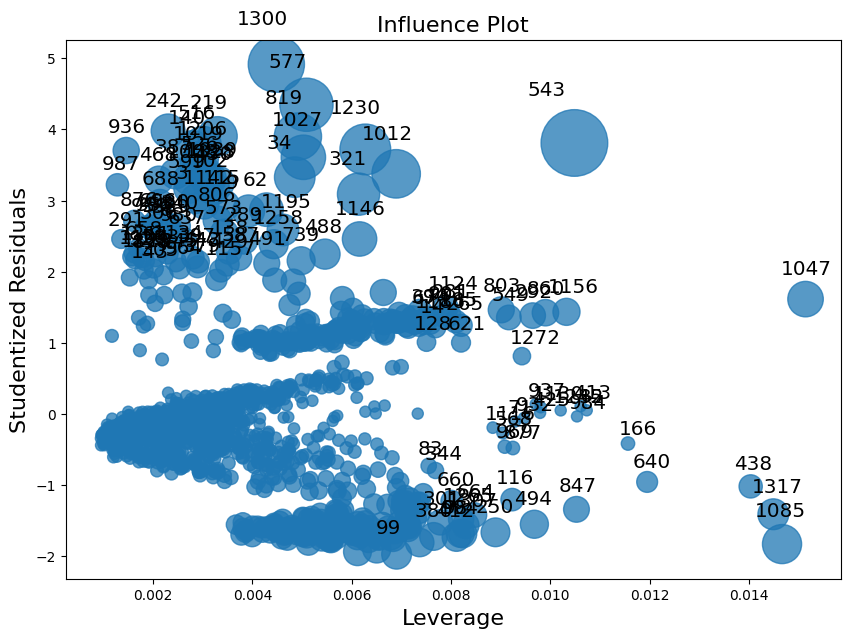

In [44]:
fig, ax = plt.subplots(figsize=(10,7))
fig=sm.graphics.influence_plot(model,ax=ax, criterion="cooks") 

In [45]:
import plotly.graph_objects as go
import statsmodels.api as sm

# Assuming "model" is already fitted using sm.OLS or another method

influence = model.get_influence()
standardized_residuals = influence.resid_studentized_internal
hat = influence.hat_matrix_diag
cooks_d = influence.cooks_distance[0]

# Scaling Cook's distance for size representation
size_marker = 50 * cooks_d / max(cooks_d)  # You can adjust the 50 here based on your desired marker size

# Create the Plotly scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=hat, y=standardized_residuals,
                         mode='markers',
                         marker=dict(size=size_marker,
                                     color=hat, colorscale='Viridis', 
                                     colorbar=dict(title='Leverage')),
                         text=cooks_d))

fig.update_layout(title='Influence Plot',
                  xaxis_title='Leverage',
                  yaxis_title='Standardized Residuals',
                  showlegend=False)

fig.show()


In [46]:
# Inluential points
#object for the analysis of influential points
infl = model.get_influence()
#members
print(dir(infl))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_get_drop_vari', '_ols_xnoti', '_plot_index', '_res_looo', 'aux_regression_endog', 'aux_regression_exog', 'cooks_distance', 'cov_ratio', 'det_cov_params_not_obsi', 'dfbeta', 'dfbetas', 'dffits', 'dffits_internal', 'endog', 'ess_press', 'exog', 'get_resid_studentized_external', 'hat_diag_factor', 'hat_matrix_diag', 'influence', 'k_vars', 'model_class', 'nobs', 'params_not_obsi', 'plot_index', 'plot_influence', 'resid', 'resid_press', 'resid_std', 'resid_studentized', 'resid_studentized_external', 'resid_studentized_internal', 'resid_var', 'results', 'scale', 'sigma2_not_obsi', 'summary_frame', 'summary_table']


In [47]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

####BEST MODEL FOR RESID
def print_sorted_values(atypical_indices, residuals, limit=None):
    # Sort the residuals by their absolute values in descending order
    sorted_indices = np.argsort(np.abs(residuals))[::-1]

    # If a limit is given, truncate the results
    if limit is not None:
        sorted_indices = sorted_indices[:limit]

    # Print the sorted indices and values from atypical_indices and residuals
    print(atypical_indices[sorted_indices], residuals[sorted_indices])

# To use the function with your provided code:

import scipy

n=1337
p=4
seuil_stud = scipy.stats.t.ppf(0.975, df=n-p-1)

# Assuming the following variables are defined elsewhere in your code:
# infl.resid_studentized_external and body.index
reg_studs = infl.resid_studentized_external
atyp_stud = np.abs(reg_studs) > seuil_stud

print_sorted_values(med_2.index[atyp_stud], reg_studs[atyp_stud], limit=15)

Int64Index([1300, 577, 242, 219, 819, 543, 516, 140, 1230, 936, 1027, 1206,
            1019, 526, 387],
           dtype='int64') [4.9146342  4.34529388 3.97746437 3.90244576 3.89857042 3.80830367
 3.78548841 3.73797514 3.71752396 3.70204862 3.60700414 3.58854193
 3.51915144 3.39053874 3.37546984]


In [48]:
#BEST MODEL FOR COOK'S
def print_sorted_cooks(indices, cooks_values, limit=None):
    # Pair up the indices and Cook's distance values, then sort by the Cook's distance value in descending order
    sorted_pairs = sorted(zip(indices, cooks_values), key=lambda x: x[1], reverse=True)
    
    # If a limit is given, truncate the results
    if limit is not None:
        sorted_pairs = sorted_pairs[:limit]
    
    # Print the sorted indices and values
    for idx, cook_value in sorted_pairs:
        print(f"Index: {idx}, Cook's Distance: {cook_value:.4f}")

# To use the function with your provided context:

n = 1337 # Assuming this is defined as before
inflsum = infl.summary_frame()
reg_cook = inflsum.cooks_d

atyp_cook = np.abs(reg_cook) >= 4/n
print_sorted_cooks(med_2.index[atyp_cook], reg_cook[atyp_cook], limit=10)

Index: 543, Cook's Distance: 0.0304
Index: 1300, Cook's Distance: 0.0214
Index: 577, Cook's Distance: 0.0191
Index: 1230, Cook's Distance: 0.0173
Index: 1012, Cook's Distance: 0.0157
Index: 819, Cook's Distance: 0.0149
Index: 1027, Cook's Distance: 0.0130
Index: 321, Cook's Distance: 0.0117
Index: 34, Cook's Distance: 0.0107
Index: 219, Cook's Distance: 0.0100


In [49]:
#FINDING AND DROPPING THE COMMON POINTS
common_indices = med_2.index[atyp_cook].intersection(med_2.index[atyp_stud])

# Drop these indices from the body dataframe
med_2_dropped = med_2.drop(common_indices)

# If you want to modify the original dataframe 'body' in-place, use this:
# body.drop(common_indices, inplace=True)

In [50]:
model =smf.ols('charges ~  age + bmi + children + smoker', data=med_2_dropped).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     1451.
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:27:36   Log-Likelihood:                -12771.
No. Observations:                1288   AIC:                         2.555e+04
Df Residuals:                    1283   BIC:                         2.558e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.27e+04    777.592    -16.337      0.000   -1.42e+04   -1.12e+04
smoker[T.yes]  2.378e+04    339.416     70.065      0.000    2.31e+04    2.44e+04
age             256.3522      9.838     26.057      0.000     237.051     275.653
bmi             324.0605     22.537     14.379      0.000     279.848     368.273
children        392.4921    113.574      3.456      0.001     169.682     615.303
==============================================================================
Omnibus:                       73.359   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.340
Skew:                           0.506   Prob(JB):                     1.63e-22
Kurtosis:                       3.920   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#Breusch-Pagan for Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic (Breusch-Pagan)', 'LM-Test p-value (Breusch-Pagan)']
print(dict(zip(labels, bp_test)))

{'LM Statistic (Breusch-Pagan)': 395.1206991839326, 'LM-Test p-value (Breusch-Pagan)': 3.151540250123594e-84}


In [52]:
from statsmodels.stats.diagnostic import het_white

# Run White test
white_test = het_white(model.resid, model.model.exog)

# Extract results
lm_statistic, lm_pvalue, f_statistic, f_pvalue = white_test

# Create a dictionary with desired output format
results_dict = {
    'LM Statistic (White Test)': lm_statistic,
    'LM-Test p-value (White Test)': lm_pvalue,
    # If you want the F-statistic results as well, uncomment the following lines:
    # 'F-Statistic': f_statistic,
    # 'F-Test p-value': f_pvalue
}

# Print the dictionary
print(results_dict)

{'LM Statistic (White Test)': 424.52078373360456, 'LM-Test p-value (White Test)': 1.4668618366069762e-82}


In [53]:
med_2['log_charges'] = np.log(med_2['charges'])

model =smf.ols('log_charges ~  age + bmi + children + smoker', data=med_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_charges   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1065.
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:27:37   Log-Likelihood:                -824.09
No. Observations:                1337   AIC:                             1658.
Df Residuals:                    1332   BIC:                             1684.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.9850      0.070    100.173      0.000       6.848       7.122
smoker[T.yes]     1.5427      0.030     50.690      0.000       1.483       1.602
age               0.0347      0.001     39.431      0.000       0.033       0.036
bmi               0.0106      0.002      5.242      0.000       0.007       0.015
children          0.1009      0.010      9.893      0.000       0.081       0.121
==============================================================================
Omnibus:                      441.587   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1547.107
Skew:                           1.603   Prob(JB):                         0.00
Kurtosis:                       7.182   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
import plotly.graph_objects as go

residuals = model.resid
fitted = model.fittedvalues

# Plotting
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=fitted, y=residuals, mode='markers', name='Residuals',
               marker=dict(color='blue'))
)

# Adding a horizontal line at y = 0
fig.add_shape(
    dict(type="line", x0=min(fitted), x1=max(fitted), y0=0, y1=0,
         line=dict(color="Red", width=1))
)

fig.update_layout(
    title="Residuals vs Fitted Values",
    xaxis_title="Fitted values",
    yaxis_title="Residuals",
    font=dict(size=14)
)

fig.show()

In [55]:
#Breusch-Pagan for Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic (Breusch-Pagan)', 'LM-Test p-value (Breusch-Pagan)']
print(dict(zip(labels, bp_test)))

{'LM Statistic (Breusch-Pagan)': 81.22999375614125, 'LM-Test p-value (Breusch-Pagan)': 9.558304014715811e-17}


In [56]:
from statsmodels.stats.diagnostic import het_white

# Run White test
white_test = het_white(model.resid, model.model.exog)

# Extract results
lm_statistic, lm_pvalue, f_statistic, f_pvalue = white_test

# Create a dictionary with desired output format
results_dict = {
    'LM Statistic (White Test)': lm_statistic,
    'LM-Test p-value (White Test)': lm_pvalue,
    # If you want the F-statistic results as well, uncomment the following lines:
    # 'F-Statistic': f_statistic,
    # 'F-Test p-value': f_pvalue
}

# Print the dictionary
print(results_dict)

{'LM Statistic (White Test)': 140.86060857103698, 'LM-Test p-value (White Test)': 1.4149123668933737e-23}


In [57]:
model =smf.ols('log_charges ~  age + bmi + children + smoker', data=med_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_charges   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1065.
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:27:38   Log-Likelihood:                -824.09
No. Observations:                1337   AIC:                             1658.
Df Residuals:                    1332   BIC:                             1684.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.9850      0.070    100.173      0.000       6.848       7.122
smoker[T.yes]     1.5427      0.030     50.690      0.000       1.483       1.602
age               0.0347      0.001     39.431      0.000       0.033       0.036
bmi               0.0106      0.002      5.242      0.000       0.007       0.015
children          0.1009      0.010      9.893      0.000       0.081       0.121
==============================================================================
Omnibus:                      441.587   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1547.107
Skew:                           1.603   Prob(JB):                         0.00
Kurtosis:                       7.182   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

####BEST MODEL FOR RESID
def print_sorted_values(atypical_indices, residuals, limit=None):
    # Sort the residuals by their absolute values in descending order
    sorted_indices = np.argsort(np.abs(residuals))[::-1]

    # If a limit is given, truncate the results
    if limit is not None:
        sorted_indices = sorted_indices[:limit]

    # Print the sorted indices and values from atypical_indices and residuals
    print(atypical_indices[sorted_indices], residuals[sorted_indices])

# To use the function with your provided code:

import scipy

n=1337
p=4
seuil_stud = scipy.stats.t.ppf(0.975, df=n-p-1)

# Assuming the following variables are defined elsewhere in your code:
# infl.resid_studentized_external and body.index
reg_studs = infl.resid_studentized_external
atyp_stud = np.abs(reg_studs) > seuil_stud

print_sorted_values(med_2.index[atyp_stud], reg_studs[atyp_stud], limit=15)


#BEST MODEL FOR COOK'S
def print_sorted_cooks(indices, cooks_values, limit=None):
    # Pair up the indices and Cook's distance values, then sort by the Cook's distance value in descending order
    sorted_pairs = sorted(zip(indices, cooks_values), key=lambda x: x[1], reverse=True)
    
    # If a limit is given, truncate the results
    if limit is not None:
        sorted_pairs = sorted_pairs[:limit]
    
    # Print the sorted indices and values
    for idx, cook_value in sorted_pairs:
        print(f"Index: {idx}, Cook's Distance: {cook_value:.4f}")

# To use the function with your provided context:

n = 1337 # Assuming this is defined as before
inflsum = infl.summary_frame()
reg_cook = inflsum.cooks_d

atyp_cook = np.abs(reg_cook) >= 4/n
print_sorted_cooks(med_2.index[atyp_cook], reg_cook[atyp_cook], limit=10)


#FINDING AND DROPPING THE COMMON POINTS
common_indices = med_2.index[atyp_cook].intersection(med_2.index[atyp_stud])

# Drop these indices from the body dataframe
med_2_dropped = med_2.drop(common_indices)

# If you want to modify the original dataframe 'body' in-place, use this:
# body.drop(common_indices, inplace=True)

Int64Index([1300, 577, 242, 219, 819, 543, 516, 140, 1230, 936, 1027, 1206,
            1019, 526, 387],
           dtype='int64') [4.9146342  4.34529388 3.97746437 3.90244576 3.89857042 3.80830367
 3.78548841 3.73797514 3.71752396 3.70204862 3.60700414 3.58854193
 3.51915144 3.39053874 3.37546984]
Index: 543, Cook's Distance: 0.0304
Index: 1300, Cook's Distance: 0.0214
Index: 577, Cook's Distance: 0.0191
Index: 1230, Cook's Distance: 0.0173
Index: 1012, Cook's Distance: 0.0157
Index: 819, Cook's Distance: 0.0149
Index: 1027, Cook's Distance: 0.0130
Index: 321, Cook's Distance: 0.0117
Index: 34, Cook's Distance: 0.0107
Index: 219, Cook's Distance: 0.0100


In [59]:
import plotly.graph_objects as go

residuals = model.resid
fitted = model.fittedvalues

# Plotting
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=fitted, y=residuals, mode='markers', name='Residuals',
               marker=dict(color='blue'))
)

# Adding a horizontal line at y = 0
fig.add_shape(
    dict(type="line", x0=min(fitted), x1=max(fitted), y0=0, y1=0,
         line=dict(color="Red", width=1))
)

fig.update_layout(
    title="Residuals vs Fitted Values",
    xaxis_title="Fitted values",
    yaxis_title="Residuals",
    font=dict(size=14)
)

fig.show()

In [60]:
from statsmodels.stats.diagnostic import het_white

# Run White test
white_test = het_white(model.resid, model.model.exog)

# Extract results
lm_statistic, lm_pvalue, f_statistic, f_pvalue = white_test

# Create a dictionary with desired output format
results_dict = {
    'LM Statistic (White Test)': lm_statistic,
    'LM-Test p-value (White Test)': lm_pvalue,
    # If you want the F-statistic results as well, uncomment the following lines:
    # 'F-Statistic': f_statistic,
    # 'F-Test p-value': f_pvalue
}

# Print the dictionary
print(results_dict)

{'LM Statistic (White Test)': 140.86060857103698, 'LM-Test p-value (White Test)': 1.4149123668933737e-23}


In [61]:
#Breusch-Pagan for Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic (Breusch-Pagan)', 'LM-Test p-value (Breusch-Pagan)']
print(dict(zip(labels, bp_test)))

{'LM Statistic (Breusch-Pagan)': 81.22999375614125, 'LM-Test p-value (Breusch-Pagan)': 9.558304014715811e-17}


In [62]:
import pandas as pd
from scipy.stats import boxcox
import statsmodels.api as sm

med_2['boxcox_charges'], _ = stats.boxcox(med_2['charges'])

model_2 = smf.ols('boxcox_charges ~ age + bmi + C(children) + C(smoker)', data=med_2).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:         boxcox_charges   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     547.2
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:27:44   Log-Likelihood:                -1336.9
No. Observations:                1337   AIC:                             2692.
Df Residuals:                    1328   BIC:                             2739.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.0402      0.103  

In [63]:
#Breusch-Pagan for Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model_2.resid, model_2.model.exog)
labels = ['LM Statistic (Breusch-Pagan)', 'LM-Test p-value (Breusch-Pagan)']
print(dict(zip(labels, bp_test)))

{'LM Statistic (Breusch-Pagan)': 79.1568228725152, 'LM-Test p-value (Breusch-Pagan)': 7.225230277480339e-14}


In [64]:
from statsmodels.stats.diagnostic import het_white

# Run White test
white_test = het_white(model_2.resid, model_2.model.exog)

# Extract results
lm_statistic, lm_pvalue, f_statistic, f_pvalue = white_test

# Create a dictionary with desired output format
results_dict = {
    'LM Statistic (White Test)': lm_statistic,
    'LM-Test p-value (White Test)': lm_pvalue,
    # If you want the F-statistic results as well, uncomment the following lines:
    # 'F-Statistic': f_statistic,
    # 'F-Test p-value': f_pvalue
}

# Print the dictionary
print(results_dict)

{'LM Statistic (White Test)': 142.45829246865682, 'LM-Test p-value (White Test)': 2.7654493706241687e-17}


In [65]:
import pandas as pd
from scipy.stats import boxcox
import statsmodels.api as sm

med_2['boxcox_charges'], _ = stats.boxcox(med_2['charges'])

model_2 = smf.ols('boxcox_charges ~ age + bmi + C(children) + C(smoker)', data=med_2).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:         boxcox_charges   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     547.2
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:27:45   Log-Likelihood:                -1336.9
No. Observations:                1337   AIC:                             2692.
Df Residuals:                    1328   BIC:                             2739.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.0402      0.103  

In [66]:
import statsmodels.api as sm
import pandas as pd
from itertools import chain, combinations
from tabulate import tabulate

# Convert categorical columns to dummies for 'smoker' and 'region'
med_2_dummies = pd.get_dummies(med_2, columns=['smoker', 'region'], drop_first=True)  # note: drop_first=True

# Base predictors without the dummy variable sets
base_predictors = ['age', 'bmi', 'children']

# Sets of dummy variables for each categorical column
smoker_set = [col for col in med_2_dummies if 'smoker_' in col]
region_set = [col for col in med_2_dummies if 'region_' in col]

# Expanded predictors list including the dummy sets
all_predictors = [base_predictors, smoker_set, region_set]

# Function to generate all combinations of predictor sets
def all_subsets(predictors):
    return chain(*map(lambda x: combinations(predictors, x), range(1, len(predictors)+1)))

# Generate combinations of the sets, then flatten each combination into a list of predictors
model_combinations = [sum(combination, []) for combination in all_subsets(all_predictors)]

summary = []

for predictors in model_combinations:
    X_sm = sm.add_constant(med_2_dummies[predictors])
    model = sm.OLS(y, X_sm).fit(cov_type='HC0')  # HC3 is a type of robust covariance estimator
    
    adj_r2 = model.rsquared_adj
    aic_value = model.aic
    bic_value = model.bic
    
    summary.append([len(predictors), adj_r2, aic_value, bic_value, ' + '.join(predictors)])

# Convert to DataFrame for easier sorting and filtering
summary_df = pd.DataFrame(summary, columns=['Number of predictors', 'Adj-R2', 'AIC', 'BIC', 'Predictors in the model'])

# Filter top 5 for each criterion
top_adj_r2 = summary_df.nlargest(5, 'Adj-R2')
top_aic = summary_df.nsmallest(5, 'AIC')
top_bic = summary_df.nsmallest(5, 'BIC')

print("Top 5 models by Adjusted R2:")
print(tabulate(top_adj_r2, headers='keys', showindex=False, tablefmt='grid'))

print("\nTop 5 models by AIC:")
print(tabulate(top_aic, headers='keys', showindex=False, tablefmt='grid'))

print("\nTop 5 models by BIC:")
print(tabulate(top_bic, headers='keys', showindex=False, tablefmt='grid'))


Top 5 models by Adjusted R2:
+------------------------+----------+---------+---------+--------------------------------------------------------------------------------------------+
|   Number of predictors |   Adj-R2 |     AIC |     BIC | Predictors in the model                                                                    |
+========================+==========+=========+=========+============================================================================================+
|                      7 | 0.749407 | 27092.4 | 27134   | age + bmi + children + smoker_yes + region_northwest + region_southeast + region_southwest |
+------------------------+----------+---------+---------+--------------------------------------------------------------------------------------------+
|                      4 | 0.748775 | 27092.8 | 27118.7 | age + bmi + children + smoker_yes                                                          |
+------------------------+----------+---------+---------+--------

In [67]:
import statsmodels.api as sm
import pandas as pd
from itertools import chain, combinations
from tabulate import tabulate

# Convert categorical columns to dummies for 'smoker' and 'region'
med_2_dummies = pd.get_dummies(med_2, columns=['smoker', 'region'], drop_first=True)  # note: drop_first=True

# Base predictors without the dummy variable sets
base_predictors = ['age', 'bmi', 'children']

# Sets of dummy variables for each categorical column
smoker_set = [col for col in med_2_dummies if 'smoker_' in col]
region_set = [col for col in med_2_dummies if 'region_' in col]

# Expanded predictors list including the dummy sets
all_predictors = [base_predictors, smoker_set, region_set]

# Function to generate all combinations of predictor sets
def all_subsets(predictors):
    return chain(*map(lambda x: combinations(predictors, x), range(1, len(predictors)+1)))

# Generate combinations of the sets, then flatten each combination into a list of predictors
model_combinations = [sum(combination, []) for combination in all_subsets(all_predictors)]

summary = []

for predictors in model_combinations:
    X_sm = sm.add_constant(med_2_dummies[predictors])
    model = sm.OLS(y, X_sm).fit(cov_type='HC0')  # Using HC0 robust covariance estimator
    
    adj_r2 = model.rsquared_adj
    aic_value = model.aic
    bic_value = model.bic
    
    summary.append([len(predictors), adj_r2, aic_value, bic_value, ' + '.join(predictors)])

# Convert to DataFrame for easier sorting and filtering
summary_df = pd.DataFrame(summary, columns=['Number of predictors', 'Adj-R2', 'AIC', 'BIC', 'Predictors in the model'])

# Filter top 5 for each criterion
top_adj_r2 = summary_df.nlargest(5, 'Adj-R2')
top_aic = summary_df.nsmallest(5, 'AIC')
top_bic = summary_df.nsmallest(5, 'BIC')

print("Top 5 models by Adjusted R2:")
print(tabulate(top_adj_r2, headers='keys', showindex=False, tablefmt='grid'))

print("\nTop 5 models by AIC:")
print(tabulate(top_aic, headers='keys', showindex=False, tablefmt='grid'))

print("\nTop 5 models by BIC:")
print(tabulate(top_bic, headers='keys', showindex=False, tablefmt='grid'))


Top 5 models by Adjusted R2:
+------------------------+----------+---------+---------+--------------------------------------------------------------------------------------------+
|   Number of predictors |   Adj-R2 |     AIC |     BIC | Predictors in the model                                                                    |
+========================+==========+=========+=========+============================================================================================+
|                      7 | 0.749407 | 27092.4 | 27134   | age + bmi + children + smoker_yes + region_northwest + region_southeast + region_southwest |
+------------------------+----------+---------+---------+--------------------------------------------------------------------------------------------+
|                      4 | 0.748775 | 27092.8 | 27118.7 | age + bmi + children + smoker_yes                                                          |
+------------------------+----------+---------+---------+--------

In [68]:
import statsmodels.formula.api as smf
import statsmodels.robust.norms as norms
import pandas as pd

# Robust Regression using Huber's T norm
model_robust = smf.rlm('charges ~ bmi + children + smoker', data=med_2, M=norms.HuberT()).fit()
print("\nRobust Regression Results:")
print(model_robust.summary())


Robust Regression Results:
                    Robust linear Model Regression Results                    
Dep. Variable:                charges   No. Observations:                 1337
Model:                            RLM   Df Residuals:                     1333
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 18 Mar 2024                                         
Time:                        12:27:46                                         
No. Iterations:                     6                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -320

In [69]:
ss_res = sum(model_robust.resid ** 2)
ss_tot = sum((med_2['charges'] - med_2['charges'].mean()) ** 2)
r2_robust = 1 - ss_res/ss_tot

r2_robust

0.6590609922721911

In [70]:
#orginal model that we know having heteroskedasticity problem
model =smf.ols('charges ~ + age + bmi + children + smoker', data=med_2).fit()

#extact HCE variance-coviance matrix
V_HC_1 =model.cov_HC0
print(V_HC_1)

[[ 9.72562305e+05 -7.18865131e+03 -4.28144858e+03 -2.53711404e+04
  -1.21134017e+04]
 [-7.18865131e+03  3.25511313e+05  3.57590481e+02 -8.54720267e+02
  -3.88395693e+03]
 [-4.28144858e+03  3.57590481e+02  1.39681739e+02 -3.98243675e+01
  -6.56177757e+01]
 [-2.53711404e+04 -8.54720267e+02 -3.98243675e+01  8.93222240e+02
  -6.71075928e+01]
 [-1.21134017e+04 -3.88395693e+03 -6.56177757e+01 -6.71075928e+01
   1.70324315e+04]]


In [71]:
import statsmodels.formula.api as smf

model = smf.ols('charges ~ age + bmi + children + smoker', data=med_2).fit(cov_type='HC0')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     601.1
Date:                Mon, 18 Mar 2024   Prob (F-statistic):          1.96e-296
Time:                        12:27:47   Log-Likelihood:                -13541.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1332   BIC:                         2.712e+04
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.21e+04    986.186    -12.268

In [72]:
from statsmodels.stats.stattools import jarque_bera

jb_test = jarque_bera(model.resid)
labels = ['JB Statistic', 'JB p-value', 'Skewness', 'Kurtosis']
print(dict(zip(labels, jb_test)))

{'JB Statistic': 719.8801537091745, 'JB p-value': 4.786420018605977e-157, 'Skewness': 1.2145858210321059, 'Kurtosis': 5.649798399405118}


In [73]:

import plotly.graph_objects as go

residuals = model.resid

# Plotting
fig = go.Figure()

# Histogram of residuals
fig.add_trace(
    go.Histogram(x=residuals, name='Residual Distribution', marker=dict(color='blue'))
)

fig.update_layout(
    title="Distribution of Residuals",
    xaxis_title="Residuals",
    yaxis_title="Frequency",
    font=dict(size=14)
)

fig.show()

In [74]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

####BEST MODEL FOR RESID
def print_sorted_values(atypical_indices, residuals, limit=None):
    # Sort the residuals by their absolute values in descending order
    sorted_indices = np.argsort(np.abs(residuals))[::-1]

    # If a limit is given, truncate the results
    if limit is not None:
        sorted_indices = sorted_indices[:limit]

    # Print the sorted indices and values from atypical_indices and residuals
    print(atypical_indices[sorted_indices], residuals[sorted_indices])

# To use the function with your provided code:

import scipy

n=1337
p=4
seuil_stud = scipy.stats.t.ppf(0.975, df=n-p-1)

# Assuming the following variables are defined elsewhere in your code:
# infl.resid_studentized_external and body.index
reg_studs = infl.resid_studentized_external
atyp_stud = np.abs(reg_studs) > seuil_stud

print_sorted_values(med_2.index[atyp_stud], reg_studs[atyp_stud], limit=15)


#BEST MODEL FOR COOK'S
def print_sorted_cooks(indices, cooks_values, limit=None):
    # Pair up the indices and Cook's distance values, then sort by the Cook's distance value in descending order
    sorted_pairs = sorted(zip(indices, cooks_values), key=lambda x: x[1], reverse=True)
    
    # If a limit is given, truncate the results
    if limit is not None:
        sorted_pairs = sorted_pairs[:limit]
    
    # Print the sorted indices and values
    for idx, cook_value in sorted_pairs:
        print(f"Index: {idx}, Cook's Distance: {cook_value:.4f}")

# To use the function with your provided context:

n = 1337 # Assuming this is defined as before
inflsum = infl.summary_frame()
reg_cook = inflsum.cooks_d

atyp_cook = np.abs(reg_cook) >= 4/n
print_sorted_cooks(med.index[atyp_cook], reg_cook[atyp_cook], limit=10)


#FINDING AND DROPPING THE COMMON POINTS
common_indices = med.index[atyp_cook].intersection(med.index[atyp_stud])

# Drop these indices from the body dataframe
med_dropped = med.drop(common_indices)

# If you want to modify the original dataframe 'body' in-place, use this:
# body.drop(common_indices, inplace=True)

Int64Index([1300, 577, 242, 219, 819, 543, 516, 140, 1230, 936, 1027, 1206,
            1019, 526, 387],
           dtype='int64') [4.9146342  4.34529388 3.97746437 3.90244576 3.89857042 3.80830367
 3.78548841 3.73797514 3.71752396 3.70204862 3.60700414 3.58854193
 3.51915144 3.39053874 3.37546984]
Index: 543, Cook's Distance: 0.0304
Index: 1300, Cook's Distance: 0.0214
Index: 577, Cook's Distance: 0.0191
Index: 1230, Cook's Distance: 0.0173
Index: 1012, Cook's Distance: 0.0157
Index: 819, Cook's Distance: 0.0149
Index: 1027, Cook's Distance: 0.0130
Index: 321, Cook's Distance: 0.0117
Index: 34, Cook's Distance: 0.0107
Index: 219, Cook's Distance: 0.0100


In [75]:
import statsmodels.formula.api as smf

model = smf.ols('charges ~ age + bmi + children + smoker', data=med_dropped).fit(cov_type='HC0')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     786.9
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:27:48   Log-Likelihood:                -12771.
No. Observations:                1288   AIC:                         2.555e+04
Df Residuals:                    1283   BIC:                         2.558e+04
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.27e+04    809.453    -15.694

In [76]:
from statsmodels.stats.stattools import jarque_bera

jb_test = jarque_bera(model.resid)
labels = ['JB Statistic', 'JB p-value', 'Skewness', 'Kurtosis']
print(dict(zip(labels, jb_test)))

{'JB Statistic': 100.3399814204597, 'JB p-value': 1.6272335032978037e-22, 'Skewness': 0.5055671893784343, 'Kurtosis': 3.920487024833667}


In [77]:
import statsmodels.formula.api as smf

model = smf.ols('charges ~ age + bmi + children + smoker', data=med_dropped).fit(cov_type='HC0')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     786.9
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:27:49   Log-Likelihood:                -12771.
No. Observations:                1288   AIC:                         2.555e+04
Df Residuals:                    1283   BIC:                         2.558e+04
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.27e+04    809.453    -15.694

In [78]:
import plotly.graph_objects as go

residuals = model.resid

# Plotting
fig = go.Figure()

# Histogram of residuals
fig.add_trace(
    go.Histogram(x=residuals, name='Residual Distribution', marker=dict(color='blue'))
)

fig.update_layout(
    title="Distribution of Residuals",
    xaxis_title="Residuals",
    yaxis_title="Frequency",
    font=dict(size=14)
)

fig.show()

In [79]:
import plotly.graph_objects as go
import numpy as np
import scipy.stats as stats

residuals = model.resid
qq = stats.probplot(residuals, dist="norm", fit=False)

# Theoretical quantiles
x = qq[0]

# Observed quantiles
y = qq[1]

# Plotting
fig = go.Figure()

# Add trace for Q-Q plot
fig.add_trace(
    go.Scatter(x=x, y=y, mode='markers', name='Residuals', marker=dict(color='blue'))
)

# Add line of best fit
m, b = np.polyfit(x, y, 1)
fig.add_trace(
    go.Scatter(x=x, y=m*x + b, mode='lines', name='Line of Best Fit', line=dict(color='red'))
)

fig.update_layout(
    title="Q-Q Plot of Residuals",
    xaxis_title="Theoretical Quantiles",
    yaxis_title="Sample Quantiles",
    font=dict(size=14)
)

fig.show()


In [80]:
med_dropped['log_charges'] = np.log(med_dropped['charges'])

model = smf.ols('log_charges ~ age + bmi + children + smoker', data=med_dropped).fit(cov_type='HC0')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     1117.
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:27:49   Log-Likelihood:                -577.45
No. Observations:                1288   AIC:                             1165.
Df Residuals:                    1283   BIC:                             1191.
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.8606      0.054    128.168

In [81]:
from statsmodels.stats.stattools import jarque_bera

jb_test = jarque_bera(model.resid)
labels = ['JB Statistic', 'JB p-value', 'Skewness', 'Kurtosis']
print(dict(zip(labels, jb_test)))


{'JB Statistic': 1170.8161083155946, 'JB p-value': 5.761192909934833e-255, 'Skewness': 1.2639003699759117, 'Kurtosis': 6.92768031315826}


In [82]:
import statsmodels.formula.api as smf

model = smf.ols('charges ~ age + bmi + children + smoker', data=med_dropped).fit(cov_type='HC0')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     786.9
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:27:50   Log-Likelihood:                -12771.
No. Observations:                1288   AIC:                         2.555e+04
Df Residuals:                    1283   BIC:                         2.558e+04
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.27e+04    809.453    -15.694

In [83]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.formula.api as smf

model = smf.ols('charges ~ age + bmi + children + smoker', data=med_dropped).fit(cov_type='HC0')

# List of predictors
predictors = ['age', 'bmi', 'children', 'smoker']

# Create subplots: 1 row, 4 columns (as there are 4 predictors)
fig = make_subplots(rows=1, cols=4, shared_yaxes=True, subplot_titles=predictors)

for i, col in enumerate(predictors):
    x = med_dropped[col]
    y = model.resid
    
    # Add scatter plot for each predictor vs residuals
    fig.add_trace(
        go.Scatter(x=x, y=y, mode='markers', name=col),
        row=1, col=i+1
    )
    
    fig.update_xaxes(title_text=col, row=1, col=i+1)
    if i == 0:  # Only add y-axis title to the first subplot for clarity
        fig.update_yaxes(title_text="residuals", row=1, col=i+1)

fig.update_layout(title_text="Residuals vs Predictors", showlegend=False)

fig.show()


In [84]:
med_dropped['log_bmi'] = np.log(med_dropped['bmi'])

model = smf.ols('charges ~ age + log_bmi + children + smoker', data=med_dropped).fit(cov_type='HC0')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     775.3
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:27:50   Log-Likelihood:                -12770.
No. Observations:                1288   AIC:                         2.555e+04
Df Residuals:                    1283   BIC:                         2.558e+04
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.615e+04   2519.500    -14.348

In [85]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.formula.api as smf

model = smf.ols('charges ~ age + log_bmi + children + smoker', data=med_dropped).fit(cov_type='HC0')

# List of predictors
predictors = ['age', 'bmi', 'children', 'smoker']

# Create subplots: 1 row, 4 columns (as there are 4 predictors)
fig = make_subplots(rows=1, cols=4, shared_yaxes=True, subplot_titles=predictors)

for i, col in enumerate(predictors):
    x = med_dropped[col]
    y = model.resid
    
    # Add scatter plot for each predictor vs residuals
    fig.add_trace(
        go.Scatter(x=x, y=y, mode='markers', name=col),
        row=1, col=i+1
    )
    
    fig.update_xaxes(title_text=col, row=1, col=i+1)
    if i == 0:  # Only add y-axis title to the first subplot for clarity
        fig.update_yaxes(title_text="residuals", row=1, col=i+1)

fig.update_layout(title_text="Residuals vs Predictors", showlegend=False)

fig.show()

In [86]:
import statsmodels.formula.api as smf
from scipy.stats import f

# Fit the model (I'm using your model as an example)
model = smf.ols('charges ~ age + log_bmi + children + smoker', data=med_dropped).fit()

# Calculate the lack of fit sum of squares
ss_residual = sum(model.resid**2)
ss_mean = sum((med_dropped['charges'] - med_dropped['charges'].mean())**2)
ss_total = ss_residual + ss_mean

# Now, we'll compute the lack-of-fit and pure error SS
groups = med_dropped.groupby(by=['age', 'bmi', 'children', 'smoker'])
ss_pe = sum(groups.apply(lambda g: sum((g['charges'] - g['charges'].mean())**2)))
ss_lof = ss_residual - ss_pe

# Now, let's calculate the degrees of freedom
df_residual = model.df_resid
df_pe = len(groups) - 1
df_lof = df_residual - df_pe

# F-statistic
F_statistic = (ss_lof/df_lof) / (ss_pe/df_pe)

# Obtain p-value for the F-statistic
p_value = 1 - f.cdf(F_statistic, df_lof, df_pe)

print(f"F-statistic: {F_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("The model seems to suffer from a lack of fit.")
else:
    print("There's no evidence of lack of fit in the model.")


F-statistic: 501656.1456
p-value: 0.0000
The model seems to suffer from a lack of fit.


In [87]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices('charges ~ age + bmi + children + smoker', data=med_dropped, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

   VIF Factor       features
0   32.335757      Intercept
1    1.001134  smoker[T.yes]
2    1.014755            age
3    1.012084            bmi
4    1.002354       children


In [88]:
import statsmodels.formula.api as smf
from scipy.stats import f

# Fit the model (I'm using your model as an example)
model = smf.ols('charges ~ age + log_bmi + children + smoker', data=med_dropped).fit()

# Calculate the lack of fit sum of squares
ss_residual = sum(model.resid**2)
ss_mean = sum((med_dropped['charges'] - med_dropped['charges'].mean())**2)
ss_total = ss_residual + ss_mean

# Now, we'll compute the lack-of-fit and pure error SS
groups = med_dropped.groupby(by=['age', 'bmi', 'children', 'smoker'])
ss_pe = sum(groups.apply(lambda g: sum((g['charges'] - g['charges'].mean())**2)))
ss_lof = ss_residual - ss_pe

# Now, let's calculate the degrees of freedom
df_residual = model.df_resid
df_pe = len(groups) - 1
df_lof = df_residual - df_pe

# F-statistic
F_statistic = (ss_lof/df_lof) / (ss_pe/df_pe)

# Obtain p-value for the F-statistic
p_value = 1 - f.cdf(F_statistic, df_lof, df_pe)

print(f"F-statistic: {F_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("The model seems to suffer from a lack of fit.")
else:
    print("There's no evidence of lack of fit in the model.")

F-statistic: 501656.1456
p-value: 0.0000
The model seems to suffer from a lack of fit.


In [89]:
import plotly.graph_objects as go
import statsmodels.formula.api as smf

# Assuming you've already loaded your dataframe med_dropped

# Fit the model
model = smf.ols('charges ~ age + bmi + children + smoker', data=med_dropped).fit(cov_type='HC0')

# Extract the residuals
res = model.resid

# Assuming your data is ordered chronologically
index = list(range(len(res)))

# Creating the figure
fig = go.Figure()

# Adding the residual trace
fig.add_trace(go.Scatter(x=index, y=res, mode='lines', name='Residuals'))

# Setting the layout attributes
fig.update_layout(
    title="Residuals over Time",
    xaxis_title="Observation Index",
    yaxis_title="Residual",
    font=dict(size=14)
)

# Display the figure
fig.show()
